In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# convolution input layer has different shape...
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

# Figure out what is happening here. What do different parameters mean in the Conv2D layer and MaxPooling layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(tf.keras.layers.Activation(tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.Activation(tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
print(type(model))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flat

In [6]:
# again if you get unexplainable errors, shutdown all other jupyter kernels (kernel->shutdown)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 46s 962us/step - loss: 0.1628 - acc: 0.9491 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 2/5
48000/48000 [==============================] - 47s 974us/step - loss: 0.0561 - acc: 0.9823 - val_loss: 0.0348 - val_acc: 0.9897
Epoch 3/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 4/5
48000/48000 [==============================] - 47s 970us/step - loss: 0.0306 - acc: 0.9900 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 5/5
48000/48000 [==============================] - 46s 952us/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0419 - val_acc: 0.9878


In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 300us/step


[0.04027803724026453, 0.9883]

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


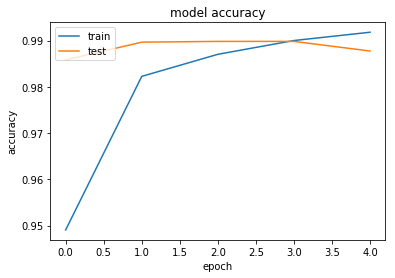

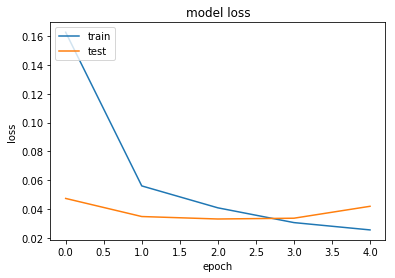

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(1, 28, 28, 1)


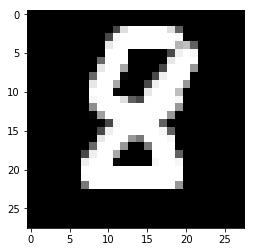

In [10]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

img = mimg.imread('number.png')

plt.imshow(img)

img = img[:,:,1]

new_input = img.reshape((1,28,28,1))
print(new_input.shape)

In [11]:
prediction = model.predict(new_input)
print('prediction:' + str(np.argmax(prediction,1)))

prediction:[8]
